# INTRODUCTION
### About the data:
Data was gathered from 552 participants in experimental speed dating events from 2002-2004. 
During the events, the attendees would have a four minute "first date" with every other participant of the opposite sex. 
At the end of their four minutes, participants were asked if they would like to see their date again. They were also asked to rate their date on six attributes: 
  - Attractiveness
  - Sincerity
  - Intelligence
  - Fun
  - Ambition
  - Shared Interests.
### The dataset also includes questionnaire data gathered from participants at different points in the process. These fields include: 
  - Demographics
  - Dating habits
  - Self-perception across key attributes
  - Beliefs on what others find valuable in a mate
  - Lifestyle information

In [7]:
# IMPORT PACKAGES
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
import statsmodels.api as sm


In [10]:
dating = pd.read_csv('Speed Dating Data.csv', encoding="ISO-8859-1")
dating.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [57]:
dating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


Text(0,0.5,'Frequency')

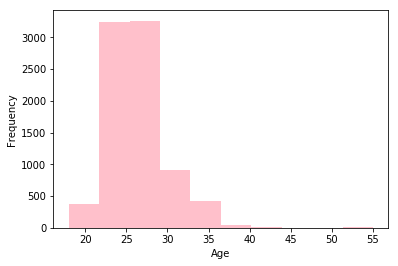

In [58]:
# Age of participants 
age = dating[np.isfinite(dating['age'])]['age']
plt.hist(age.values, facecolor = 'pink')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [22]:
# How many people have found their match from the experience? :)
pd.crosstab(index=dating['match'],columns="count")

col_0,count
match,
0,6998
1,1380


In [78]:
# Dating life : How often do participants go on a date?
dating_frequency = dating['date'].value_counts()

In [102]:
# What do participants expect from this event? 
top_5_goal = dating['goal'].value_counts().head()
top_5_goal


1.0    3426
2.0    3012
3.0     631
5.0     510
6.0     419
Name: goal, dtype: int64

In [104]:
goal_map = {
    1:'Seemed like a fun night out',
    2: 'To meet new people',
    3: 'To get a date',
    4: 'Looking for a serious relationship',
    5: 'To say I did it',
    6: 'Others'
}

In [105]:
goal_map[1]
def my_func(goal):
    return goal_map[goal]
index0 = top_5_goal.index.map(my_func)
index0

Index(['Seemed like a fun night out', 'To meet new people', 'To get a date',
       'To say I did it', 'Others'],
      dtype='object')

Text(0.5,1,'WHAT PARTICIPANTS EXPECT FROM THE EVENT')

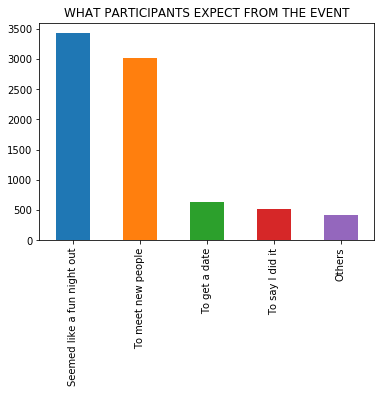

In [106]:
ax = top_5_goal.plot(kind='bar',)

ax.set_xticklabels(index0)
plt.title('WHAT PARTICIPANTS EXPECT FROM THE EVENT')

In [94]:
# Top 3 jobs that has the most YES for 'Would you like to see him/her again?' (career_c)
yes_date = dating['dec_o']==1
yes_date
top_dating_career=dating[yes_date]['career_c'].value_counts().head(3)
top_dating_career

7.0    934
2.0    926
1.0    310
Name: career_c, dtype: int64

In [92]:
career_map = {
1: 'Lawyer', 
2:'Academic/Research',
3: ' Psychologist',
4: ' Doctor/Medicine',
5: 'Engineer', 
6: 'Creative Arts/Entertainment',
7: 'Banking/Consulting/CEO/Entrepreneur',
8: 'Real Estate',
9: 'International/Humanitarian Affairs',
10: 'Undecided',
11: 'Social Work',
12: 'Speech Pathology',
13: 'Politics',
14: 'Pro sports/Athletics',
15: 'Other',
16: 'Journalism',
17: 'Architecture'

}

In [95]:
career_map[1]
def my_func(career):
    return career_map[career]
index = top_dating_career.index.map(my_func)
index

Index(['Banking/Consulting/CEO/Entrepreneur', 'Academic/Research', 'Lawyer'], dtype='object')

Text(0.5,1,'TOP 3 JOBS THAT RECEIVE THAT MOST YES FROM PARTNERS')

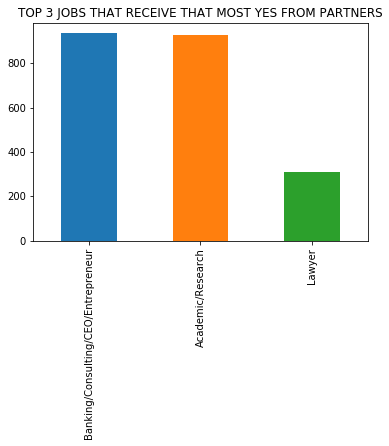

In [101]:
ax = top_dating_career.plot(kind='bar',)
# plt.xticks(top_dating_career.index,index)
ax.set_xticklabels(index)
plt.title('TOP 3 JOBS THAT RECEIVE THAT MOST YES FROM PARTNERS')

In [66]:
#Did participant receive a call from their date after the event? 
call_me_maybe = sum(dating['them_cal']>0)
call_me_maybe/8377*100

23.862958099558316

In [60]:
#How likely you're gonna be 'heart-broken'? ( when you like someone but they don't like you back)
broken_heart_count = len(dating[(dating['dec_o']==0) & (dating['dec']==1)]) 
+ len(dating[(dating['dec_o']==1) & (dating['dec']==0)])
perc_broken_heart = broken_heart_count / len(dating.index)
perc_broken_heart*100

25.51921699689663

In [112]:
# Does being the same race matter to have a match/
race_match = dating[['samerace','match']]
race_match.head()

,samerace,match
0,0,0
1,0,0
2,1,1
3,0,1
4,0,1


In [115]:
race_match_corr = race_match.corr()
print(race_match_corr)

          samerace     match
samerace  1.000000  0.013028
match     0.013028  1.000000


## Clean data before Modeling


In [124]:
dating2 = dating.isnull().sum()
dating2 = dating2.sort_values()

In [134]:
dating_x = dating2[dating2 < 1000].index

In [139]:

dating_cl = dating[dating_x]
dating_cl.head()

,iid,dec_o,samerace,match,partner,order,position,dec,wave,condtn,...,satis_2,length,sinc3_2,attr3_2,intel1_2,sinc1_2,amb3_2,fun3_2,attr1_2,numdat_2
0,1,0,0,0,1,4,7,1,1,1,...,6.0,2.0,7.0,6.0,13.89,16.67,6.0,7.0,19.44,1.0
1,1,0,0,0,2,3,7,1,1,1,...,6.0,2.0,7.0,6.0,13.89,16.67,6.0,7.0,19.44,1.0
2,1,1,1,1,3,10,7,1,1,1,...,6.0,2.0,7.0,6.0,13.89,16.67,6.0,7.0,19.44,1.0
3,1,1,0,1,4,5,7,1,1,1,...,6.0,2.0,7.0,6.0,13.89,16.67,6.0,7.0,19.44,1.0
4,1,1,0,1,5,7,7,1,1,1,...,6.0,2.0,7.0,6.0,13.89,16.67,6.0,7.0,19.44,1.0


In [145]:
dating_cl = dating_cl.dropna()

In [146]:
dating_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5519 entries, 30 to 8374
Columns: 101 entries, iid to numdat_2
dtypes: float64(85), int64(13), object(3)
memory usage: 4.3+ MB


In [148]:
dating_cl.select_dtypes(include='object')
dating_final = dating_cl.drop(columns = ['field','from','career'])

# Build and Evaluate Model

In [173]:
X = dating_final.drop(columns=['match','dec','dec_o'])
y = dating_final['match']

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=101)

In [175]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [176]:
prediction = model.predict(X_test)

In [177]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [178]:
confusion_matrix(y_test, prediction)

array([[853,  48],
       [134,  69]], dtype=int64)

In [179]:
report = classification_report(y_test, prediction)
print(report)

             precision    recall  f1-score   support

          0       0.86      0.95      0.90       901
          1       0.59      0.34      0.43       203

avg / total       0.81      0.84      0.82      1104



In [185]:
from sklearn.tree import DecisionTreeClassifier 

In [186]:
dtc = DecisionTreeClassifier()

In [187]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [196]:
prediction2 = dtc.predict(X_test)

In [197]:
matrix = confusion_matrix(y_test, prediction2)
report = classification_report(y_test, prediction2)
print(matrix)
print(report)

[[773 128]
 [129  74]]
             precision    recall  f1-score   support

          0       0.86      0.86      0.86       901
          1       0.37      0.36      0.37       203

avg / total       0.77      0.77      0.77      1104



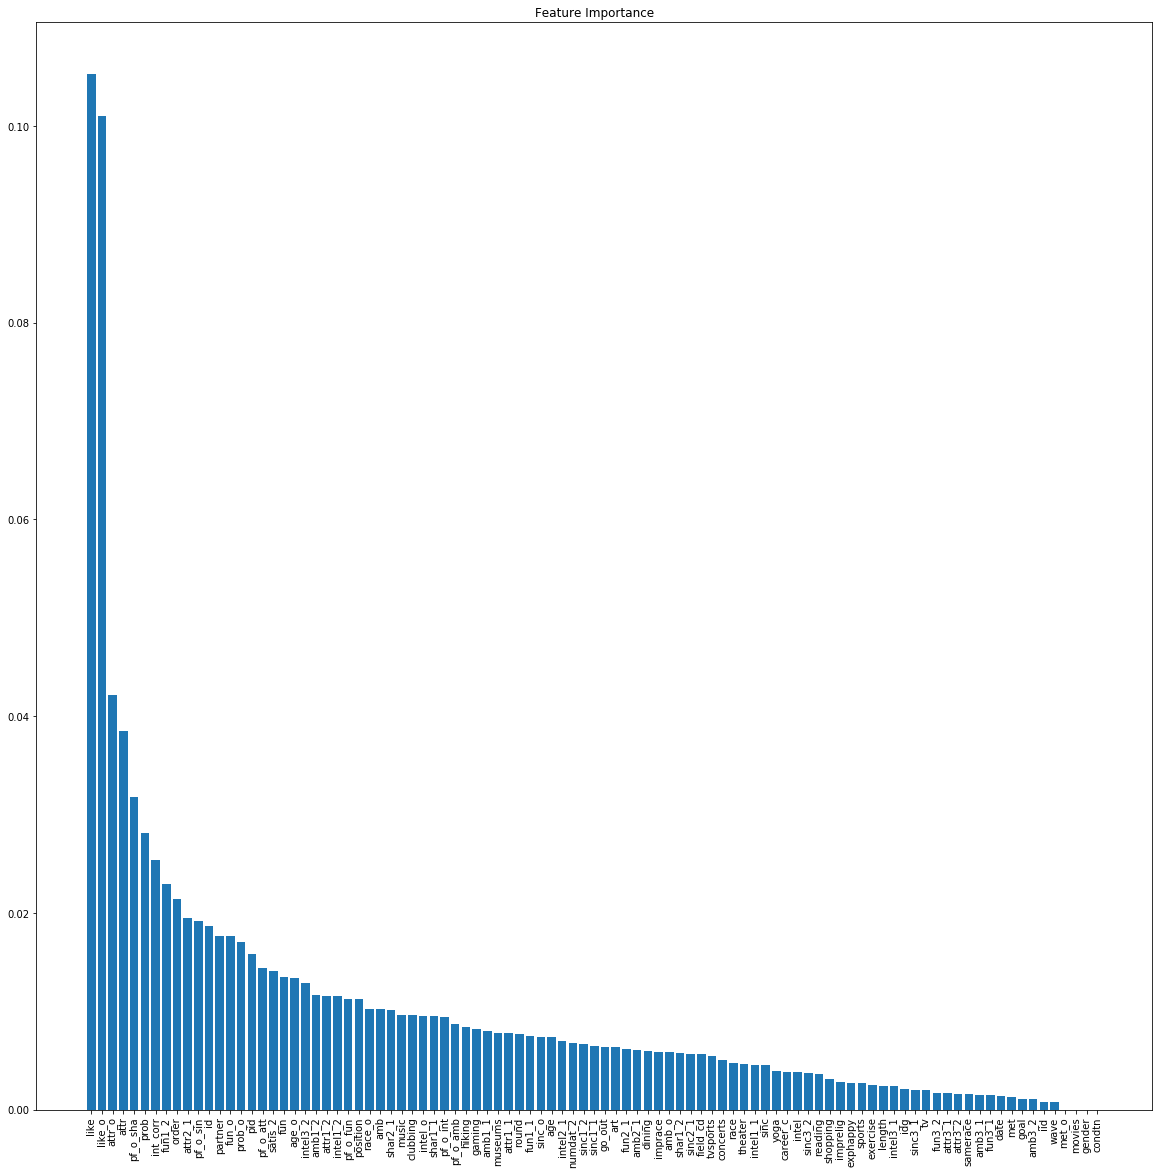

In [192]:
importances = dtc.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(20,20))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [193]:
names[:20]

['like',
 'like_o',
 'attr_o',
 'attr',
 'pf_o_sha',
 'prob',
 'int_corr',
 'fun1_2',
 'order',
 'attr2_1',
 'pf_o_sin',
 'id',
 'partner',
 'fun_o',
 'prob_o',
 'pid',
 'pf_o_att',
 'satis_2',
 'fun',
 'age_o']